# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [96]:
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind
from statsmodels.stats.power import ttest_power

In [149]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [150]:
##H0 - mean of the GPU1 is equal to zero
##HA - mean of GPU1 is not equal to zero
t_statistic, p_value = ttest_1samp(GPU1,0)
print(t_statistic,p_value)
# p_value < 0.05 => alternative hypothesis:
# data deviate significantly from the hypothesis that the mean is 0 at the 5% level of significance
print ("one-sample t-test p-value=", p_value)
if p_value<0.05:
    print("Reject H0, i.e,mean of  GPU1 is not equal to zero")
else:
    print("Failed to Reject H0, mean of GPU1 is equal to zero")

34.056241516158195 7.228892044970457e-15
one-sample t-test p-value= 7.228892044970457e-15
Reject H0, i.e,mean of  GPU1 is not equal to zero


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [151]:
##H0-There is no significant difference between data sets i.e, mean of GPU1 = mean of GPU2
##HA - There is significance difference between data set i.e, mean of GPU1 is not equal to mean of GPU2

t_statistic, p_value = ttest_ind(GPU1, GPU2)
print(t_statistic, p_value)
if p_value<0.05:
    print("Reject H0, i.e, There is significant differencce between the dataset")
    print ("two-sample t-test p-value=", p_value)
else:
    print("Failed to Reject H0, i.e, there is no significance between data set, and they have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)
    
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level


-2.627629513471839 0.013794282041452725
Reject H0, i.e, There is significant differencce between the dataset
two-sample t-test p-value= 0.013794282041452725


## Question 3

He is trying a third GPU - GPU3.

In [46]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [152]:
##H0-There is no significant difference between data sets i.e, mean of GPU1 = mean of GPU3
##HA - There is significance difference between data set i.e, mean of GPU1 is not equal to mean of GPU3

t_statistic, p_value = ttest_ind(GPU1, GPU3)
print(t_statistic, p_value)
if p_value<0.05:
    print("Reject H0, i.e,There is significant differencce between the dataset and they dont have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)
else:
    print("Failed to Reject H0, i.e, there is no significance between data set, they have the same mean at 5% significance level")
    print ("two-sample t-test p-value=", p_value)

-1.4988943759093303 0.14509210993138993
Failed to Reject H0, i.e, there is no significance between data set, they have the same mean at 5% significance level
two-sample t-test p-value= 0.14509210993138993


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [30]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [154]:

import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

statistic,pvalue=levene(e1,e2,e3)
print("Pvalue as per Levene's test",pvalue)
if pvalue>0.05:
    print("All variances are equal as per Levene's test, Failed to reject H0")
else:
    print("Atleast one of the variances not equal, Reject H0")


# p-value > 0.05 hence all variances are equal

Pvalue as per Levene's test 0.12259792666001798
All variances are equal as per Levene's test, Failed to reject H0


## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [40]:
f, p = f_oneway(e1,e2,e3)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

if p<0.05:
    print("Atleast one of the means is significantly different")
else:
    print("Means are not significantly different")

One-way ANOVA
F value: 2.51357622845924
P value: 0.13574644501798466 

Means are not significantly different


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I error:

It is the conditional probability of rejecting a null hypothesis when it is true, is called **Type I error or False positive.** $\alpha$, the level of significance is the value of Type I error. P(Reject null hypothesis | $H_0$ is true) = $\alpha$

Type II error:
It is the conditional probability of retaining a null hypothesis when it is true, is called **Type II error or False Negative.** $\beta$, is the value of Type II error. P(Retain null hypothesis | $H_0$ is false) = $\beta$

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


H0 =Null Hypothesis- Significant change in wait time in past month from the mean of 4.5 mins


HA = Alternate Hypothesis - No significant change in wait time from the past population mean of 4.5 mins

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [52]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [58]:
from scipy.stats import chisquare,chi2_contingency
threshold=0.01
chi2,p,dof,expected=chi2_contingency(dice)
if p<threshold:
    print("Reject the null hypothesis since pvalue less than threshold of=", threshold)
else:
    print("Failed to reject the null hypothesis since test is not significant and greater than threshold")
print("Chi2 stat =", chi2)
print("p-value =", p)
print("dof =", p)
print("contingency =",expected)

Failed to reject the null hypothesis since test is not significant
Chi2 stat = 23.315671914716496
p-value = 0.07766367301496693
dof = 0.07766367301496693
contingency = [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [122]:
zscore=stats.zscore(dice, axis=1, ddof=1)
print("Zscore for the dice data")
print(zscore)

Zscore for the dice data
[[-0.40824829  0.81649658 -1.22474487  0.81649658]
 [ 1.09544512 -0.54772256  0.54772256 -1.09544512]
 [ 0.1823492   1.15487828 -0.06078307 -1.27644442]
 [-0.59160798  1.43676223 -0.08451543 -0.76063883]
 [-1.1         1.3         0.1        -0.3       ]
 [ 0.7406129  -1.37542395 -0.10580184  0.7406129 ]]


In [121]:
pvalue=stats.norm.cdf(zscore) ##since standard normal distribution sd=1 and mean =0
print("Pvalue for the Zscore")
print(pvalue)
print("pvalue mean = ",np.mean(pvalue))

Pvalue for the Zscore
[[0.3415457  0.79289191 0.11033568 0.79289191]
 [0.86333916 0.29194121 0.70805879 0.13666084]
 [0.57234566 0.87592986 0.47576599 0.10089923]
 [0.27705657 0.92460722 0.46632332 0.22343641]
 [0.13566606 0.90319952 0.53982784 0.38208858]
 [0.77053591 0.08450002 0.45786979 0.77053591]]
pvalue mean =  0.49992721122099804


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [0]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [123]:
wt_before = [76, 76, 72, 73, 64, 63, 75, 75, 71, 76, 71, 76, 78, 73, 76, 70, 71, 82, 84, 68, 70, 68, 66, 67, 74]
wt_after  = [63, 72, 67, 69, 58, 59, 70, 71, 70, 71, 68, 71, 72, 69, 72, 67, 67, 78, 79, 62, 67, 63, 61, 63, 69]

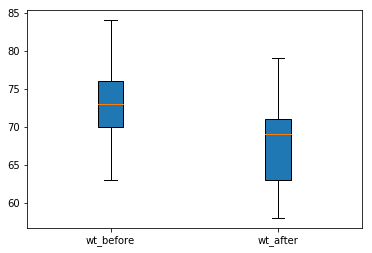

[72.83059085 63.97435184 65.35877598 71.0023326  72.27382756 70.19222471
 69.03701953 67.66117956 75.08588552 71.06350368 71.78678945 70.00358598
 73.64515086 74.09331701 67.34446568 84.07922522 69.44433641 75.41600936
 69.7957516  64.04183892 72.19011172 73.87139926 73.87473623 67.69033472]
[132.6164792  133.75155092 132.69720413 144.53224545 140.82892628
 137.76177789 142.4997462  138.25931077 139.6109053  141.82312474
 143.79282718 137.66229826 137.45964049 132.84442192 133.66980089
 156.80020816 141.39508976 139.17966699 133.12142926 132.10999256
 151.08349643 147.05188596 140.0136524  136.23269779]
Pvalue is  3.704651177780503e-11
Reject H0, accept the alternate hypothesis that there is significant weight loss after treatment


In [156]:
##H0: no weight loss after treatment
##HA: weight loss after treatment  using the drug
from scipy import stats
import matplotlib.pyplot as plt
box_plot_data=[wt_before,wt_after]
plt.boxplot(box_plot_data,patch_artist=True,labels=['wt_before','wt_after'])
plt.show()

loc_before=np.mean(wt_before)
scale_before=np.std(wt_before)
size=24
loc_after=np.mean(wt_after)
scale_after=np.std(wt_after)
before= stats.norm.rvs(scale=scale_before, loc=loc_before, size=size) ## Creates a normal distribution with a mean value of 100 and std of 30
print(before)
after = before + stats.norm.rvs(scale=scale_after, loc=loc_after, size=size)
print(after)
statistic,pvalue=stats.ttest_rel(wt_before, wt_after)
print("Pvalue is ",pvalue)
if pvalue<0.05:
    print("Reject H0, accept the alternate hypothesis that there is significant weight loss after treatment")
else:
    print("Failed to reject H0")